## Defining the Question

### a) Specifying the Question

The research question is to identify prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly.

Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D).


### b) Defining the Metric for Success

For this analysis to be considered successful, the following areas must be covered:
1. If we predict home team scores.
2. If we predict away team scores
3. Perfom feature engeneering by figuring out from the home team’s perspective if the game is a Win, Lose or Draw.

### c) Understanding the context 

Mchezopesa Limited is a company that mainly perform ranking and prediction of world teams. The ranking are based on different factors that contribute to making of ranking decisions. The company has requested our services to perform ranking and predictions of the teams based on the passed information.

How ranking is done;

After a long period testing and analysing the best way to calculate the FIFA/Coca-Cola World Ranking, a new model took effect in August 2018 after approval by the FIFA Council.

This new version developed by FIFA was named "SUM" as it relies on adding/subtracting points won or lost for a game to/from the previous point totals rather than averaging game points over a given time period as in the previous version of the World Ranking.

The points which are added or subtracted are partially determined by the relative strength of the two opponents, including the logical expectation that teams higher in the ranking should fare better against teams lower in the ranking.

### d) Recording the Experimental Design

The following steps will be followed in conducting this study:
1. Defining the Question 
2. Reading the Data.
3. Checking the Data.
4. Perform any necessary feature engineering
5. Cross-validate the model
6. Compute RMSE
7. Check of multicollinearity
8. Implement the solution
9. Challenging the solution
10. Conclusions and Recommendations. 

### e) Data Relevance

The data provided aligns with the context of our study. This data provided are csv file in a zip folder https://drive.google.com/file/d/1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc/view

The dataset contains crucial information about the dataset here are some of the column explanations;

Country Abbreviation
Total Points
Previous Points
Rank Change
Average Previous Years Points
Average Previous Years Points Weighted (50%)
Average 2 Years Ago Points
Average 2 Years Ago Points Weighted (30%)
Average 3 Years Ago Points
Average 3 Years Ago Points Weighted (20%)
Confederation
Date - date of the match
Home_team - the name of the home team
Away_team - the name of the away team
Home_score - full-time home team score including extra time, not including penalty-shootouts
Away_score - full-time away team score including extra time, not including penalty-shootouts
Tournament - the name of the tournament
City - the name of the city/town/administrative unit where the match was played
Country - the name of the country where the match was played
Neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue

## Reading the Data

### Importing our Libraries

In [67]:
# Let us first import all the libraries we will need for our analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport
from scipy import stats
from scipy.stats import norm
from scipy.stats import t
import math
from scipy.stats import ttest_ind
import statsmodels.api as sm
import plotly.express as px

### Loading our Dataset

In [68]:
# Loading the Dataset from the source i.e. csv

fifa_ranking = pd.read_csv('fifa_ranking.csv')

results = pd.read_csv('results.csv')

### Previewing the Dataset 

In [69]:
# previewing the first five entries of the dataset

fifa_ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [70]:
# previewing the last five entries of the dataset

fifa_ranking.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [71]:
# previewing the data head
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [72]:
# the tail of dataset

results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


## Checking the Data

### Fifa ranking data

In [73]:
# From our profile report, we can see that we don't have any duplicated rows
# But let us check 
fifa_ranking.duplicated().sum()

37

In [74]:
# droping columns that are duplicated

fifa_ranking.drop_duplicates().head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [75]:
#selecting the relevant columns to work with.
fifa_df = fifa_ranking[["rank","country_full","confederation","rank_date"]]
fifa_df.head()

,rank,country_full,confederation,rank_date
0,1,Germany,UEFA,1993-08-08
1,2,Italy,UEFA,1993-08-08
2,3,Switzerland,UEFA,1993-08-08
3,4,Sweden,UEFA,1993-08-08
4,5,Argentina,CONMEBOL,1993-08-08


In [76]:
#creating a copy of ranking_1 dataset
fifa_df1 = fifa_df
# Separate the date column into Year and Month of the fifa_ranking dataset
fifa_df['rank_date'] = pd.to_datetime(fifa_df['rank_date'], errors='coerce')

fifa_df1['year'] = fifa_df.rank_date.dt.year
fifa_df1['month'] =fifa_df.rank_date.dt.month
fifa_df1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,rank,country_full,confederation,rank_date,year,month
0,1,Germany,UEFA,1993-08-08,1993,8
1,2,Italy,UEFA,1993-08-08,1993,8
2,3,Switzerland,UEFA,1993-08-08,1993,8
3,4,Sweden,UEFA,1993-08-08,1993,8
4,5,Argentina,CONMEBOL,1993-08-08,1993,8


In [77]:
# renaming the country_full column to home_team to merge with the results dataset and obtain the home team rank
fifa_df1 = fifa_df1.rename({'country_full': 'home_team'}, axis = 1)
fifa_df1.head()

,rank,home_team,confederation,rank_date,year,month
0,1,Germany,UEFA,1993-08-08,1993,8
1,2,Italy,UEFA,1993-08-08,1993,8
2,3,Switzerland,UEFA,1993-08-08,1993,8
3,4,Sweden,UEFA,1993-08-08,1993,8
4,5,Argentina,CONMEBOL,1993-08-08,1993,8


In [78]:
# renaming the country_full column to home_team to merge with the results dataset and obtain the home team rank
fifa_df2 = fifa_df
fifa_df2 = fifa_df2.rename({'country_full': 'away_team'}, axis = 1)
fifa_df2.head()

,rank,away_team,confederation,rank_date,year,month
0,1,Germany,UEFA,1993-08-08,1993,8
1,2,Italy,UEFA,1993-08-08,1993,8
2,3,Switzerland,UEFA,1993-08-08,1993,8
3,4,Sweden,UEFA,1993-08-08,1993,8
4,5,Argentina,CONMEBOL,1993-08-08,1993,8


### Results Data

In [79]:
results.duplicated().sum()

0

In [80]:
# checking anormalities

results['date'].describe()

count          40839
unique         15115
top       2012-02-29
freq              66
Name: date, dtype: object

In [81]:
#dropping the row entries before 1993 since they do not have records
#in the ranking  dataframe.
results_df = results
results_df = results[results["date"] > '1993-01-01']
results_df.shape
#dropped 40839-23477 = 17362 row entries

(23477, 9)

In [82]:
#creating a copy of results_1 dataset
results_df1 = results_df
# Separate the date column into Year and Month of the fifa_ranking dataset
results_df['date'] = pd.to_datetime(results_df['date'], errors='coerce')

results_df1['year'] = results_df.date.dt.year
results_df1['month'] =results_df.date.dt.month
results_df1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month
17362,1993-01-02,Gabon,Burkina Faso,1,1,Friendly,Libreville,Gabon,False,1993,1
17363,1993-01-02,Kuwait,Lebanon,2,0,Friendly,Kuwait City,Kuwait,False,1993,1
17364,1993-01-03,Burkina Faso,Mali,1,0,Friendly,Libreville,Gabon,True,1993,1
17365,1993-01-03,Gabon,Ghana,2,3,Friendly,Libreville,Gabon,False,1993,1
17366,1993-01-08,Uganda,Tanzania,3,1,Friendly,Kampala,Uganda,False,1993,1


## Merging the datasets

In [83]:
## Merging the two datasets to obtain the home_team rank dataset : home_team, year and month
fifa_home = pd.merge(results_df1, fifa_df1, how='left', on = ['home_team', 'year', 'month'])
fifa_home.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,confederation,rank_date
0,1993-01-02,Gabon,Burkina Faso,1,1,Friendly,Libreville,Gabon,False,1993,1,NaN,NaN,NaT
1,1993-01-02,Kuwait,Lebanon,2,0,Friendly,Kuwait City,Kuwait,False,1993,1,NaN,NaN,NaT
2,1993-01-03,Burkina Faso,Mali,1,0,Friendly,Libreville,Gabon,True,1993,1,NaN,NaN,NaT
3,1993-01-03,Gabon,Ghana,2,3,Friendly,Libreville,Gabon,False,1993,1,NaN,NaN,NaT
4,1993-01-08,Uganda,Tanzania,3,1,Friendly,Kampala,Uganda,False,1993,1,NaN,NaN,NaT


In [84]:
# we shall rename the rank column to obtaing the home_team_rank
fifa_home = fifa_home.rename({'rank': 'home_team_rank'}, axis = 1)
fifa_home.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,home_team_rank,confederation,rank_date
0,1993-01-02,Gabon,Burkina Faso,1,1,Friendly,Libreville,Gabon,False,1993,1,NaN,NaN,NaT
1,1993-01-02,Kuwait,Lebanon,2,0,Friendly,Kuwait City,Kuwait,False,1993,1,NaN,NaN,NaT
2,1993-01-03,Burkina Faso,Mali,1,0,Friendly,Libreville,Gabon,True,1993,1,NaN,NaN,NaT
3,1993-01-03,Gabon,Ghana,2,3,Friendly,Libreville,Gabon,False,1993,1,NaN,NaN,NaT
4,1993-01-08,Uganda,Tanzania,3,1,Friendly,Kampala,Uganda,False,1993,1,NaN,NaN,NaT


In [85]:
## Merging the two datasets to obtain the away_team rank dataset : home_team, year and month
fifa_away = pd.merge(results_df1, fifa_df2, how='left', on = ['away_team', 'year', 'month'])
fifa_away.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,confederation,rank_date
0,1993-01-02,Gabon,Burkina Faso,1,1,Friendly,Libreville,Gabon,False,1993,1,NaN,NaN,NaT
1,1993-01-02,Kuwait,Lebanon,2,0,Friendly,Kuwait City,Kuwait,False,1993,1,NaN,NaN,NaT
2,1993-01-03,Burkina Faso,Mali,1,0,Friendly,Libreville,Gabon,True,1993,1,NaN,NaN,NaT
3,1993-01-03,Gabon,Ghana,2,3,Friendly,Libreville,Gabon,False,1993,1,NaN,NaN,NaT
4,1993-01-08,Uganda,Tanzania,3,1,Friendly,Kampala,Uganda,False,1993,1,NaN,NaN,NaT


In [86]:
# we shall rename the rank column to obtaing the away rank of the team
fifa_away = fifa_away.rename({'rank': 'away_team_rank'}, axis = 1)
fifa_away.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,away_team_rank,confederation,rank_date
0,1993-01-02,Gabon,Burkina Faso,1,1,Friendly,Libreville,Gabon,False,1993,1,NaN,NaN,NaT
1,1993-01-02,Kuwait,Lebanon,2,0,Friendly,Kuwait City,Kuwait,False,1993,1,NaN,NaN,NaT
2,1993-01-03,Burkina Faso,Mali,1,0,Friendly,Libreville,Gabon,True,1993,1,NaN,NaN,NaT
3,1993-01-03,Gabon,Ghana,2,3,Friendly,Libreville,Gabon,False,1993,1,NaN,NaN,NaT
4,1993-01-08,Uganda,Tanzania,3,1,Friendly,Kampala,Uganda,False,1993,1,NaN,NaN,NaT


In [87]:
# we therefore merge the two dataset to obtain one dataset

fifa = pd.merge(fifa_home, fifa_away, how = 'inner', left_on = ['year', 'month','away_team'], right_on = ['year', 'month','away_team'])


## Data Cleaning

In [88]:
# finding the shape of the dataframe
fifa.shape

(41432, 25)

In [89]:
# getting to know about the data

fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41432 entries, 0 to 41431
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date_x           41432 non-null  datetime64[ns]
 1   home_team_x      41432 non-null  object        
 2   away_team        41432 non-null  object        
 3   home_score_x     41432 non-null  int64         
 4   away_score_x     41432 non-null  int64         
 5   tournament_x     41432 non-null  object        
 6   city_x           41432 non-null  object        
 7   country_x        41432 non-null  object        
 8   neutral_x        41432 non-null  bool          
 9   year             41432 non-null  int64         
 10  month            41432 non-null  int64         
 11  home_team_rank   31754 non-null  float64       
 12  confederation_x  31754 non-null  object        
 13  rank_date_x      31754 non-null  datetime64[ns]
 14  date_y           41432 non-null  datet

In [90]:
# data description

fifa.describe()

,home_score_x,away_score_x,year,month,home_team_rank,home_score_y,away_score_y,away_team_rank
count,41432.000000,41432.000000,41432.000000,41432.000000,31754.000000,41432.000000,41432.000000,31535.000000
mean,1.640930,1.142571,2006.106681,6.543107,80.364584,1.640833,1.142426,82.172507
std,1.729318,1.418702,7.490041,3.284529,51.507223,1.729354,1.418700,52.665396
min,0.000000,0.000000,1993.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,2000.000000,4.000000,37.000000,0.000000,0.000000,38.000000
50%,1.000000,1.000000,2006.000000,6.000000,76.000000,1.000000,1.000000,77.000000
75%,2.000000,2.000000,2012.000000,9.000000,117.000000,2.000000,2.000000,119.000000
max,31.000000,21.000000,2019.000000,12.000000,209.000000,31.000000,21.000000,209.000000


In [91]:
# checking for duplicates
fifa.duplicated().sum()

83

In [92]:
fifa.drop_duplicates()

,date_x,home_team_x,away_team,home_score_x,away_score_x,tournament_x,city_x,country_x,neutral_x,year,month,home_team_rank,confederation_x,rank_date_x,date_y,home_team_y,home_score_y,away_score_y,tournament_y,city_y,country_y,neutral_y,away_team_rank,confederation_y,rank_date_y
0,1993-01-02,Gabon,Burkina Faso,1,1,Friendly,Libreville,Gabon,False,1993,1,NaN,NaN,NaT,1993-01-02,Gabon,1,1,Friendly,Libreville,Gabon,False,NaN,NaN,NaT
1,1993-01-02,Kuwait,Lebanon,2,0,Friendly,Kuwait City,Kuwait,False,1993,1,NaN,NaN,NaT,1993-01-02,Kuwait,2,0,Friendly,Kuwait City,Kuwait,False,NaN,NaN,NaT
2,1993-01-03,Burkina Faso,Mali,1,0,Friendly,Libreville,Gabon,True,1993,1,NaN,NaN,NaT,1993-01-03,Burkina Faso,1,0,Friendly,Libreville,Gabon,True,NaN,NaN,NaT
3,1993-01-03,Gabon,Ghana,2,3,Friendly,Libreville,Gabon,False,1993,1,NaN,NaN,NaT,1993-01-03,Gabon,2,3,Friendly,Libreville,Gabon,False,NaN,NaN,NaT
4,1993-01-08,Uganda,Tanzania,3,1,Friendly,Kampala,Uganda,False,1993,1,NaN,NaN,NaT,1993-01-08,Uganda,3,1,Friendly,Kampala,Uganda,False,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41427,2019-07-14,Algeria,Nigeria,2,1,African Cup of Nations,Cairo,Egypt,True,2019,7,NaN,NaN,NaT,2019-07-14,Algeria,2,1,African Cup of Nations,Cairo,Egypt,True,NaN,NaN,NaT
41428,2019-07-14,Algeria,Nigeria,2,1,African Cup of Nations,Cairo,Egypt,True,2019,7,NaN,NaN,NaT,2019-07-17,Tunisia,0,1,African Cup of Nations,Cairo,Egypt,True,NaN,NaN,NaT
41429,2019-07-17,Tunisia,Nigeria,0,1,African Cup of Nations,Cairo,Egypt,True,2019,7,NaN,NaN,NaT,2019-07-14,Algeria,2,1,African Cup of Nations,Cairo,Egypt,True,NaN,NaN,NaT
41430,2019-07-17,Tunisia,Nigeria,0,1,African Cup of Nations,Cairo,Egypt,True,2019,7,NaN,NaN,NaT,2019-07-17,Tunisia,0,1,African Cup of Nations,Cairo,Egypt,True,NaN,NaN,NaT


In [93]:
fifa.isnull().sum()

date_x                0
home_team_x           0
away_team             0
home_score_x          0
away_score_x          0
tournament_x          0
city_x                0
country_x             0
neutral_x             0
year                  0
month                 0
home_team_rank     9678
confederation_x    9678
rank_date_x        9678
date_y                0
home_team_y           0
home_score_y          0
away_score_y          0
tournament_y          0
city_y                0
country_y             0
neutral_y             0
away_team_rank     9897
confederation_y    9897
rank_date_y        9897
dtype: int64

In [94]:
# dropping the null rows
fifa = fifa.dropna()
fifa.shape

(28518, 25)

In [95]:
# droping irrelevant columns
fifa.drop(['date_y','home_team_y', 'home_score_y', 'away_score_y', 'tournament_y', 'country_y', 'neutral_y', 'confederation_y', 'rank_date_y','date_x','confederation_x','rank_date_x'], axis=1,inplace=True)

In [96]:
fifa.head()

,home_team_x,away_team,home_score_x,away_score_x,tournament_x,city_x,country_x,neutral_x,year,month,home_team_rank,city_y,away_team_rank
1224,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19.0,Barranquilla,67.0
1225,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19.0,Buenos Aires,67.0
1226,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False,1993,8,5.0,Barranquilla,67.0
1227,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False,1993,8,5.0,Buenos Aires,67.0
1228,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,8,70.0,Lima,5.0


In [97]:
# renaming our columns 
fifa.rename(columns={'home_team_x': 'home_team', 'home_score_x': 'home_score', 'away_score_x': 'away_score', 'tournament_x': 'tournament',
                     'city_x': 'city', 'country_x': 'country', 'neutral_x': 'neutral'}, inplace=True)
fifa.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,home_team_rank,city_y,away_team_rank
1224,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19.0,Barranquilla,67.0
1225,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19.0,Buenos Aires,67.0
1226,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False,1993,8,5.0,Barranquilla,67.0
1227,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False,1993,8,5.0,Buenos Aires,67.0
1228,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,8,70.0,Lima,5.0


In [98]:
#Using dummy indicators
#creating a copy
fifa1 = fifa
fifa1['neutral'] = pd.get_dummies(fifa1['neutral'], drop_first=True)
fifa1.neutral.unique()

array([0, 1], dtype=uint8)

#### Feature engineering

In [99]:
#creating a column(final_score) that shows whether the match ended in a win, loss or draw
# let
fifa1 = fifa
fifa1['score'] = fifa1['home_score'] - fifa1['away_score']
def home_team(home_score):
    if home_score > 0:
        return 'win'
    elif home_score < 0:
        return 'loss'
    else:
        return 'draw'
      
fifa1['outcome'] = fifa1.score.apply(lambda h: home_team(h))
fifa1.head(5)

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,home_team_rank,city_y,away_team_rank,score,outcome
1224,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,0,1993,8,19.0,Barranquilla,67.0,0,draw
1225,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,0,1993,8,19.0,Buenos Aires,67.0,0,draw
1226,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,0,1993,8,5.0,Barranquilla,67.0,0,draw
1227,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,0,1993,8,5.0,Buenos Aires,67.0,0,draw
1228,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,0,1993,8,70.0,Lima,5.0,-1,loss


## EXPLORATORY DATA ANALYSIS

### UNIVARIATE ANALYSIS

In [100]:
# finding the information about the variables
fifa1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28518 entries, 1224 to 39756
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   home_team       28518 non-null  object 
 1   away_team       28518 non-null  object 
 2   home_score      28518 non-null  int64  
 3   away_score      28518 non-null  int64  
 4   tournament      28518 non-null  object 
 5   city            28518 non-null  object 
 6   country         28518 non-null  object 
 7   neutral         28518 non-null  uint8  
 8   year            28518 non-null  int64  
 9   month           28518 non-null  int64  
 10  home_team_rank  28518 non-null  float64
 11  city_y          28518 non-null  object 
 12  away_team_rank  28518 non-null  float64
 13  score           28518 non-null  int64  
 14  outcome         28518 non-null  object 
dtypes: float64(2), int64(5), object(7), uint8(1)
memory usage: 3.3+ MB


In [101]:
# checking for anormalities
Q1 = fifa1.quantile(0.25)
Q3 = fifa1.quantile(0.75)

IQR = Q3 - Q1
IQR
lower_bound = Q1 - (1.5*IQR)
upper_bound = Q3 + (1.5*IQR)

print('Lower_Bound' +str(lower_bound))
print('Upper_Bound' +str(upper_bound))

Lower_Boundhome_score          -3.0
away_score          -3.0
neutral             -1.5
year              1982.0
month               -5.0
home_team_rank     -83.5
away_team_rank     -83.5
score               -5.5
dtype: float64
Upper_Boundhome_score           5.0
away_score           5.0
neutral              2.5
year              2030.0
month               19.0
home_team_rank     232.5
away_team_rank     240.5
score                6.5
dtype: float64


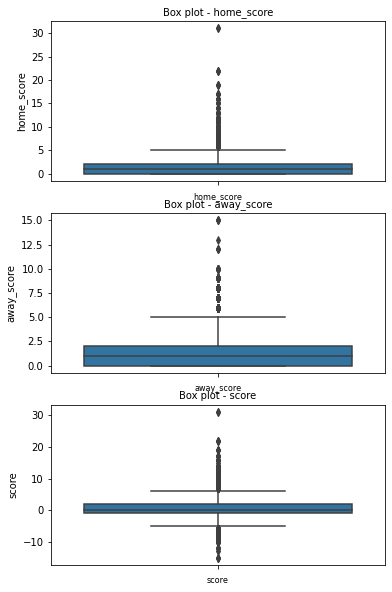

In [102]:
# checking for outliers
col_names = ['home_score', 'away_score', 'score']

fig, ax = plt.subplots(len(col_names), figsize= (6,10))

for i, col_val in enumerate(col_names):
  sns.boxplot(y = fifa1[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

In [103]:
# Removing the outliers

fifa1 = fifa1[~((fifa1 < (Q1 - 1.5 * IQR)) |(fifa1 > (Q3 + 1.5 * IQR))).any(axis=1)]
fifa1.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,home_team_rank,city_y,away_team_rank,score,outcome
1224,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,0,1993,8,19.0,Barranquilla,67.0,0,draw
1225,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,0,1993,8,19.0,Buenos Aires,67.0,0,draw
1226,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,0,1993,8,5.0,Barranquilla,67.0,0,draw
1227,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,0,1993,8,5.0,Buenos Aires,67.0,0,draw
1228,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,0,1993,8,70.0,Lima,5.0,-1,loss


In [104]:
# Getting the size of our data set after removing the outliers
fifa1.shape

# Afer removing the outliers we remain with 863 rows.

(27494, 15)

Text(0.5, 1.0, 'Results of the Games')

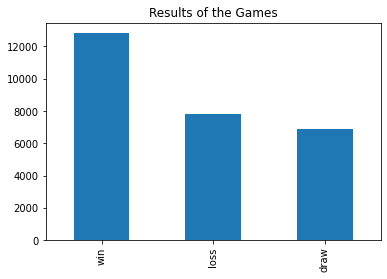

In [105]:
# Bar graph showing the outcome of the games

fifa1.outcome.value_counts().plot.bar()
plt.title('Results of the Games')
# most of the games are wins

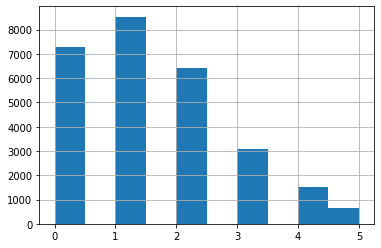

In [106]:
# histogram showing the score distribtion

fifa1['home_score'].hist()

# most of the scores are 1.

### c) Summary Statistics

In [107]:
fifa1.describe(include= 'all')

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,home_team_rank,city_y,away_team_rank,score,outcome
count,27494,27494,27494.000000,27494.000000,27494,27494,27494,27494.000000,27494.000000,27494.000000,27494.000000,27494,27494.000000,27494.000000,27494
unique,193,193,NaN,NaN,65,1331,210,NaN,NaN,NaN,NaN,1377,NaN,NaN,3
top,Mexico,Saudi Arabia,NaN,NaN,Friendly,Doha,United States,NaN,NaN,NaN,NaN,Doha,NaN,NaN,win
freq,460,382,NaN,NaN,10157,506,1173,NaN,NaN,NaN,NaN,493,NaN,NaN,12834
mean,NaN,NaN,1.453444,1.051611,NaN,NaN,NaN,0.321015,2006.238234,6.715247,77.777661,NaN,79.857605,0.401833,NaN
std,NaN,NaN,1.274438,1.112972,NaN,NaN,NaN,0.466875,6.848670,3.367044,50.505658,NaN,51.544062,1.788864,NaN
min,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,1993.000000,1.000000,1.000000,NaN,1.000000,-5.000000,NaN
25%,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,2000.000000,4.000000,35.000000,NaN,37.000000,-1.000000,NaN
50%,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,0.000000,2007.000000,6.000000,73.000000,NaN,74.000000,0.000000,NaN
75%,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,1.000000,2012.000000,10.000000,113.000000,NaN,116.000000,1.000000,NaN


## Implementing the solution

##### Checking for multicolinearity

In [108]:
# finding the correlations between the variables

corr = fifa1[['home_score','away_score','home_team_rank','away_team_rank'	]].corr()
corr

,home_score,away_score,home_team_rank,away_team_rank
home_score,1.000000,-0.118843,-0.136568,0.249845
away_score,-0.118843,1.000000,0.169986,-0.170120
home_team_rank,-0.136568,0.169986,1.000000,0.530895
away_team_rank,0.249845,-0.170120,0.530895,1.000000


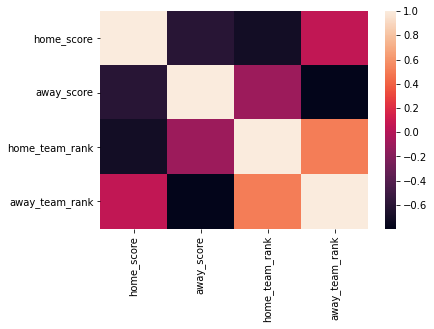

In [109]:
# Checking for independence between features¶
# 
sns.heatmap(corr.corr())  

# Regression

## Polynomial Analysis

In [110]:
# difining the independent and the dependent variables
X = fifa1.iloc[:, [3,7,8,9,10,12,13]].values
y = fifa1.iloc[:, 2].values
print(X)
print(y)

[[ 0.000e+00  0.000e+00  1.993e+03 ...  1.900e+01  6.700e+01  0.000e+00]
 [ 0.000e+00  0.000e+00  1.993e+03 ...  1.900e+01  6.700e+01  0.000e+00]
 [ 0.000e+00  0.000e+00  1.993e+03 ...  5.000e+00  6.700e+01  0.000e+00]
 ...
 [ 3.000e+00  1.000e+00  2.018e+03 ...  7.000e+00  5.000e+00  1.000e+00]
 [ 1.000e+00  1.000e+00  2.018e+03 ...  6.100e+01  8.000e+00 -1.000e+00]
 [ 1.000e+00  1.000e+00  2.018e+03 ...  1.200e+01  3.000e+00 -1.000e+00]]
[0 0 0 ... 4 0 0]


### Computing RMSE

In [111]:
# Split the dataset into train and test sets
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
# This is our prediction for admission based on our model
y_pred = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix
# Let's describe our residual:
pd.DataFrame(residuals).describe()
print("The RMSE score for the model : ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("The residual mean score for the model : ", residuals.mean())

The RMSE score for the model :  8.534083558607903e-15
The residual mean score for the model :  -3.3233073825286316e-17


### checking heteroscedasticity using Bartlett’s test

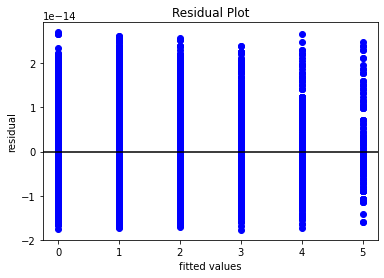

In [112]:
residuals = y_pred - y_test

# Plotting the prediction errors

plt.scatter(y_pred, residuals, color='blue')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='black')
plt.show()

In [113]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


## Predicting how many goal home team scores

In [117]:
# difining the independent and the dependent variables
X = fifa1.iloc[:, 13:14].values
y = fifa1.iloc[:, 2].values
print(X)
print(y)

[[ 0]
 [ 0]
 [ 0]
 ...
 [ 1]
 [-1]
 [-1]]
[0 0 0 ... 4 0 0]


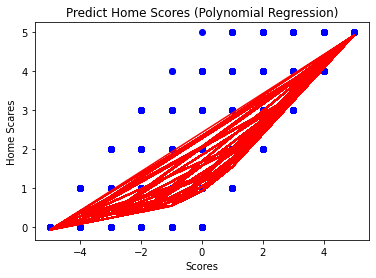

In [125]:
# Split the dataset into train and test sets
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# Fit polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression
poly_reg_4 = PolynomialFeatures(degree = 4) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Predict Home Scores (Polynomial Regression)')
plt.xlabel('Scores')
plt.ylabel('Home Scares')
plt.show()


In [124]:
# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg_4.fit_transform([[6.5]]))
print('Polynomial prediction: %d' %poly_pred)

# We can also get the predictions as an array
poly_arr_pred = pol_reg.predict(poly_reg_4.fit_transform(X))

Polynomial prediction: 4


> There is a higher probability of home team winning by 4 goals

#### Predicting Away Scores

In [126]:
# difining the independent and the dependent variables
X = fifa1.iloc[:, 13:14].values
y = fifa1.iloc[:, 3].values
print(X)
print(y)

[[ 0]
 [ 0]
 [ 0]
 ...
 [ 1]
 [-1]
 [-1]]
[0 0 0 ... 3 1 1]


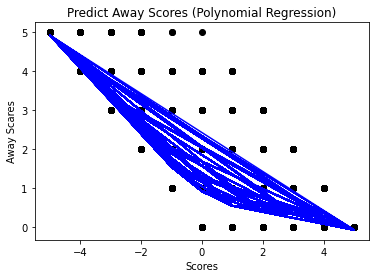

In [127]:
# Split the dataset into train and test sets
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# Fit polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression
poly_reg_4 = PolynomialFeatures(degree = 4) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='black')
plt.plot(X, pol_reg.predict(X_poly), color='blue')
plt.title('Predict Away Scores (Polynomial Regression)')
plt.xlabel('Scores')
plt.ylabel('Away Scares')
plt.show()


In [128]:
# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg_4.fit_transform([[6.5]]))
print('Polynomial prediction: %d' %poly_pred)

# We can also get the predictions as an array
poly_arr_pred = pol_reg.predict(poly_reg_4.fit_transform(X))

Polynomial prediction: -1


> There is a high probability of the away team being less by score by one goal

## Logistic Regression

#### Predicting if the game was a win, loss or draw.

In [ ]:
fifa1.drop(['home_team',	'away_team',	'tournament',	'city',	'country',	'neutral',	'year',	'month',	'city_y'],axis=1,inplace=True)
fifa1.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,home_score,away_score,home_team_rank,away_team_rank,score,outcome
1224,0,0,19.0,67.0,0,draw
1225,0,0,19.0,67.0,0,draw
1226,0,0,5.0,67.0,0,draw
1227,0,0,5.0,67.0,0,draw
1228,0,1,70.0,5.0,-1,loss


In [ ]:
# changing the categorical variables attrition to binary 
fifa1['outcome'] = fifa1['outcome'].astype('category')

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

fifa1['outcome'] = labelencoder.fit_transform(fifa1['outcome'])
fifa1['outcome']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1224     0
1225     0
1226     0
1227     0
1228     1
        ..
39752    1
39753    2
39754    2
39755    1
39756    1
Name: outcome, Length: 27494, dtype: int64

In [ ]:
# Splitting our dataset
#
X = fifa1.drop("outcome",axis=1)
y = fifa1["outcome"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=0)

In [ ]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[2041,    0,    0],
       [   0, 2366,    0],
       [   0,    0, 3842]])

> The model predicts that 2041 game would be a draw, 2366 would be a lose and 3842 games would be a win both home and away.

In [ ]:
import scipy as sp
residuals = np.subtract(y_pred, y_test)
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

## comparing the critical value and the test result
if (test_result > critical_value):
 print('the variances are unequal, and the model should be reassessed')
else:
 print('the variances are homogeneous!')

inf
the variances are homogeneous!


/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2241: RuntimeWarning:

divide by zero encountered in log



> The model is homogeneous since the test results are greater than the critical value, they add upto infinity.

### Challenging the solution

### Perfoming Hyperparameter tuning

In [ ]:
# Loading libraries
import numpy as np
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV

In [ ]:
# Splitting our dataset
#
X = fifa1.drop("outcome",axis=1)
y = fifa1["outcome"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=0)

In [ ]:
# Creating the logistic regression
logistic = linear_model.LogisticRegression()

# Creating regularization penalty space
penalty = ['l1', 'l2']

# Creating regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Creating hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [ ]:
# Creating grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

# Fitting grid search
best_model = clf.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) o

In [ ]:
# Viewing best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

# Predicting target vector
best_model.predict(X)

Best Penalty: l2
Best C: 1.0


array([0, 0, 0, ..., 2, 1, 1], dtype=int64)

## Conclusion

> The model performed were well exercuted, there were dificulties in perfomance of multivariate polynomial hence perfomed simple polynomial on score and away and home goals to predict the away and home goals.

> For the logistic regression, the code was exercuted to predict how many games were wins, loses and draws.

## Recomendation

> Most of the teams should practice efficiently when going for away games since most of the teams tend to be less by 1 goal in most of the away games.

> By the prediction its most likely that away matches are lost to the home teams.

## Follow up Questions

### a). Did we have the right data?

#### Yes, but the merging of the dataset was  challenging since the columns were not directly related.

### b). Do we need other data to answer our question?

#### We have enough dataset for the analysis

### c). Did we have the right question?

#### Yes, but challenging to answer the questions